# UMAP + DBSCAN

In [36]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#pd.set_option('max_columns',20)
#pd.set_option('max_rows',52)
#%matplotlib inline

## Data preparation

In [37]:
# Importing the dataset
df = pd.read_csv('bank.csv')
df = df.drop(['id'], axis=1)

In [3]:
df

,age,sex,income,married,children,car,mortgage,delays
0,48,FEMALE,17546.00,NO,1,NO,NO,YES
1,40,MALE,30085.10,YES,3,YES,YES,NO
2,51,FEMALE,16575.40,YES,0,YES,NO,YES
3,23,FEMALE,20375.40,YES,3,NO,NO,YES
4,57,FEMALE,50576.30,YES,0,NO,NO,NO
...,...,...,...,...,...,...,...,...
595,61,FEMALE,47025.00,NO,2,YES,YES,NO
596,30,FEMALE,9672.25,YES,0,YES,NO,YES
597,31,FEMALE,15976.30,YES,0,YES,NO,YES
598,29,MALE,14711.80,YES,0,NO,YES,YES


In [38]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [39]:
# Encoding categorical data
df = encoding_char(df)

In [42]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df_sc = sc.transform(df)
df_sc = pd.DataFrame(df_sc, columns = ['age','sex','income','married','children','car','mortgage','delays'])

## DBSCAN

In [54]:
from sklearn.cluster import DBSCAN
X = df_sc.to_numpy()
clustering = DBSCAN(eps=0.5,min_samples=2).fit(X)
#print(clustering.labels_)

In [51]:
def plot_2d(X, label_list_cluster):
    plt.figure(figsize=(7, 7))
    plt.subplots_adjust(bottom=0.1)
    c = label_list_cluster
    plt.scatter(X[:, 0], X[:, 1], c=c, cmap='rainbow', label='True Position')
    plt.show()

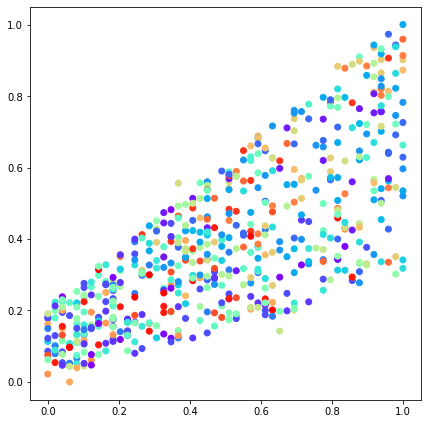

In [53]:
plot_2d(df_sc[['age', 'income']].to_numpy(),clustering.labels_)

## UMAP

In [11]:
#!pip install umap-learn

In [48]:
#!pip install datashader
#!pip install bokeh 
#!pip install holoviews 
#!pip install scikit-image
#!pip install colorcet

In [29]:
import umap
import umap.plot

In [47]:
X = df_sc.to_numpy()
reducer = umap.UMAP(n_neighbors = 15, min_dist = 0, n_epochs=50000)
X_umap = reducer.fit_transform(X)
clustering = DBSCAN(eps=0.5,min_samples=3).fit(X_umap)
print(clustering.labels_)

[ 0  1  2  3  4  4  5  6  7  6  4  8  9 10 11 10  9 12  3 13 14 15 14 16
 17  1 18  3  8 15  4  3 13 19 20  3 13 19  2 21 18  7 22 10 23 18 19 24
 22  2 17 14 15  5 18 21  0 15  3 23  9 25 14 15 23 15  5 26  5  3 13  5
 27  9 25 25 26  1  2  7  0  5  3 15 18 13  3 16 27  3 27 26 21  6  7  3
 11  1  0  2 11  2 27 28  4  6  6 15  5 10 20  1  7 17  6  4  3 11 17  7
 28  7  9  0 22 14  7  4 13 19  5 18 19  7 10  2 29 21  4 21 14  4 29  1
 15 18 13  0  6  2  6 22 18 11 17  3  6 13  3  3 13  3 21 19  4 11 24 24
 19 14  6 15  6 13  4 21  6 29 15 14  9 20  8 29  8 27  9  4  1  3  7 13
  4 27  6 11 30  6 24  3 13 12 15 22 11 23 22  9  6  5 17 13 13  5 15 15
  2 10 22  7 19 14  4 12 14 25  6  5 23 17 10 28 11  7 21 30 22  9  3 13
  2 25  6  2  6 28 19 14 15  6 28 10 11  3 30 19 21  9 30  5 15  9  4 10
 17 13 22 21  7 23 26 25 15 13  7 27 30 13 26 18 15  3  6 12  3 15 27  4
 15  7  5 25  1  3 18  1  8 15 19  3 29  3  4 18 21  3 22 17 22  0 14 20
 19 19  2 28 22 26 21 23 22 27 29  5 15  0 18 11 26

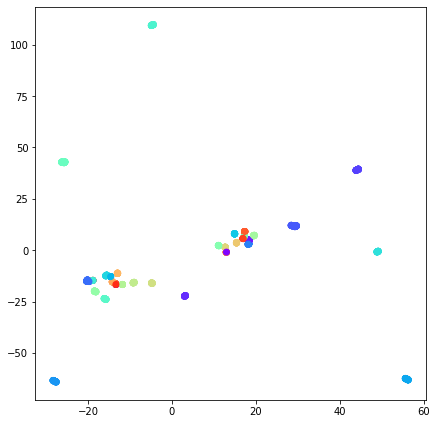

In [56]:
plot_2d(X_umap,clustering.labels_)